


                              Descriptive Statistics for pain
count    48.000000
mean     10.220803
std       2.961328
min       2.130000
25%       8.022115
50%       9.649160
75%      12.445577
max      16.600000
Name: pain, dtype: float64



The descriptive statistics provide a summary of the central tendency, dispersion, and shape of the distribution of data.
Here are the key values and their interpretations:
 ~ count: Number of non-missing observations in the dataset.
 ~ mean: Average value of the data.
 ~ std: Standard deviation, which measures the dispersion of data points around the mean.
 ~ min: Minimum value in the dataset.
 ~ 25%: Lower quartile or first quartile, representing the value below which 25% of the data fall.
 ~ 50%: Median or second quartile, representing the middle value of the dataset.
 ~ 75%: Upper quartile or third quartile, representing the value below which 75% of the data fall.
 ~ max: Maximum value in the dataset.
Interpretation: These statistics help u

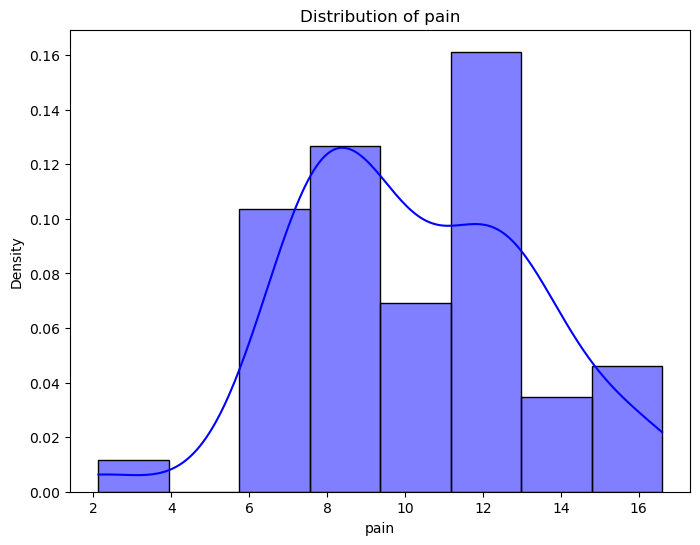

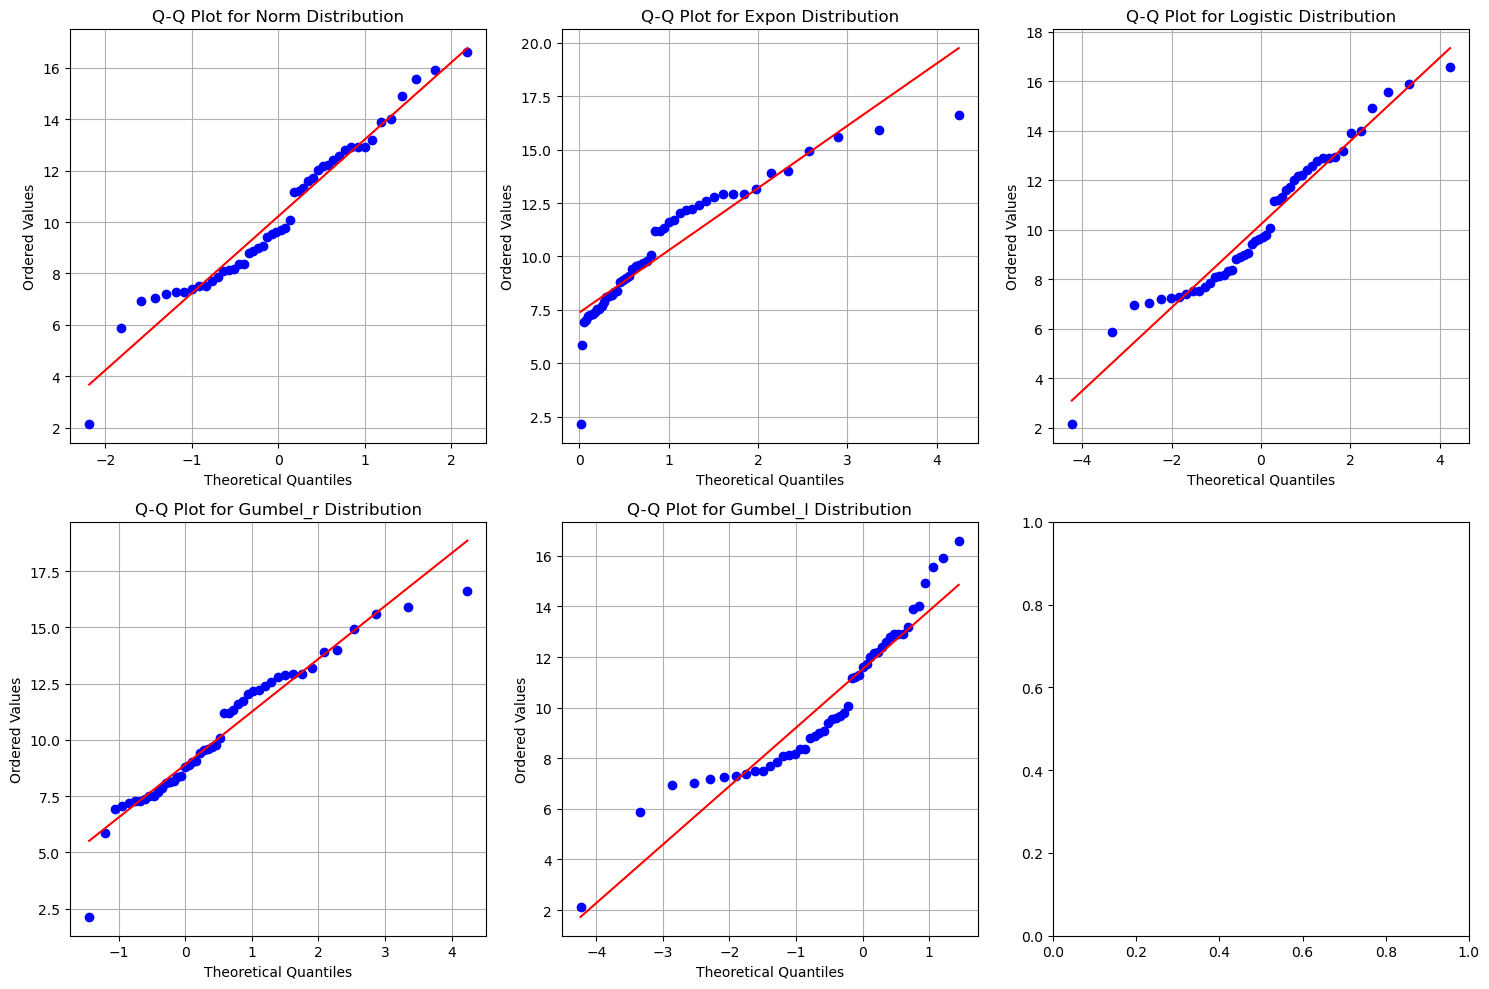

                     Goodness-of-Fit Test Results for pain                      
Distribution    AD Statistic    Critical Values                          Significance Levels                     
norm            0.622946        0.54, 0.61, 0.73, 0.86, 1.02             15.00, 10.00, 5.00, 2.50, 1.00          
expon           11.376416       0.91, 1.06, 1.32, 1.59, 1.93             15.00, 10.00, 5.00, 2.50, 1.00          
logistic        0.729923        0.42, 0.56, 0.66, 0.77, 0.90, 1.00       25.00, 10.00, 5.00, 2.50, 1.00, 0.50    
gumbel_r        0.851161        0.46, 0.62, 0.74, 0.85, 1.01             25.00, 10.00, 5.00, 2.50, 1.00          
gumbel_l        1.152407        0.46, 0.62, 0.74, 0.85, 1.01             25.00, 10.00, 5.00, 2.50, 1.00          






In [2]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog, ttk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Global variables
df = None
columns = None
window = None

# Read Excel file
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        global df, columns
        df = pd.read_excel(file_path)
        columns = df.columns.tolist()
        return df
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

# Function to plot histogram for a selected column
def plot_histogram(column, num_bins=8):
    """Plots histogram for the selected column."""
    try:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color='blue', stat='density', bins=num_bins)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram: {e}")

# Function to plot Q-Q plot for a specified distribution
def plot_qq_plot(data, dist, ax):
    """Plot Q-Q plot for the specified distribution."""
    try:
        stats.probplot(data, dist=dist, plot=ax)
        ax.set_title(f'Q-Q Plot for {dist.capitalize()} Distribution')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Ordered Values')
        ax.grid(True)
    except Exception as e:
        print(f"Error plotting Q-Q plot: {e}")

# Function to fit common distributions to the selected column and evaluate goodness-of-fit
def fit_distributions(column):
    """Fits common distributions to the selected column and evaluates goodness-of-fit."""
    try:
        data = df[column].dropna()
        distributions = ['norm', 'expon', 'logistic', 'gumbel_r', 'gumbel_l']
        results = {}
        for dist_name in distributions:
            dist = getattr(stats, dist_name)
            params = dist.fit(data)
            result = stats.anderson(data, dist_name)
            crit_values = result.critical_values
            sig_levels = result.significance_level
            results[dist_name] = {'params': params, 'AD_statistic': result.statistic, 'critical_values': crit_values, 'significance_levels': sig_levels}
        return distributions, results
    except Exception as e:
        print(f"Error fitting distributions: {e}")
        return None, None

# Main function to create GUI window and handle user interactions
def main():
    global df, window

    window = tk.Tk()
    window.title("Distribution Fitting")

    def open_file_dialog():
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
        if file_path:
            df = read_excel_file(file_path)
            if df is not None:
                show_column_selection()

    file_button = tk.Button(window, text="Select Excel File", command=open_file_dialog)
    file_button.pack(pady=20)

    def show_column_selection():
        for widget in window.winfo_children():
            widget.destroy()

        label = tk.Label(window, text="Select Column:")
        label.pack(pady=10)

        global combo
        combo = ttk.Combobox(window, values=columns)
        combo.pack(pady=10)

        analyze_button = tk.Button(window, text="Analyze", command=analyze_data)
        analyze_button.pack(pady=10)

    def analyze_data():
        selected_column = combo.get()
        descriptive_stats = df[selected_column].describe()
        print("=" * 80)
        print(" " * 30 + f"Descriptive Statistics for {selected_column}")
        print("=" * 80)
        print(descriptive_stats)
        print("\n\n")
        print("The descriptive statistics provide a summary of the central tendency, dispersion, and shape of the distribution of data.")
        print("Here are the key values and their interpretations:")
        print(" ~ count: Number of non-missing observations in the dataset.")
        print(" ~ mean: Average value of the data.")
        print(" ~ std: Standard deviation, which measures the dispersion of data points around the mean.")
        print(" ~ min: Minimum value in the dataset.")
        print(" ~ 25%: Lower quartile or first quartile, representing the value below which 25% of the data fall.")
        print(" ~ 50%: Median or second quartile, representing the middle value of the dataset.")
        print(" ~ 75%: Upper quartile or third quartile, representing the value below which 75% of the data fall.")
        print(" ~ max: Maximum value in the dataset.")
        print("Interpretation: These statistics help understand the distribution of the data and identify any outliers or skewness.")
        print("=" * 80)
        print("\n\n\n")
        plot_histogram(selected_column)

        if selected_column:
            selected_data = df[selected_column].dropna()
            distributions, results = fit_distributions(selected_column)
            
            num_plots = len(distributions)
            num_cols = 3
            num_rows = math.ceil(num_plots / num_cols)

            fig_qq, axes_qq = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
            
            for i, dist_name in enumerate(distributions):
                row = i // num_cols
                col = i % num_cols
                ax_qq = axes_qq[row, col] if num_plots > 1 else axes_qq
                
                plot_qq_plot(selected_data, dist_name, ax_qq)
                ax_qq.set_title(f'Q-Q Plot for {dist_name.capitalize()} Distribution')
                ax_qq.set_xlabel('Theoretical Quantiles')
                ax_qq.set_ylabel('Ordered Values')
                ax_qq.grid(True)

            plt.tight_layout()
            plt.show()

        if results:
            print(f"Goodness-of-Fit Test Results for {selected_column}".center(80))
            print("=" * 80)
            print("{:<15} {:<15} {:<40} {:<40}".format('Distribution', 'AD Statistic', 'Critical Values', 'Significance Levels'))

            for dist_name, result in results.items():
                crit_values_str = ', '.join([f"{crit_val:.2f}" for crit_val in result['critical_values']])
                sig_levels_str = ', '.join([f"{sig_level:.2f}" for sig_level in result['significance_levels']])
                print("{:<15} {:<15f} {:<40} {:<40}".format(dist_name, result['AD_statistic'], crit_values_str, sig_levels_str))

            print("\n\n\n")
            print("=" * 80)

        else:
            print("No results.")

    window.mainloop()

if __name__ == "__main__":
    main()
